# Run The BOPTEST Building Simulator to Generate System Identification Data

In [1]:
import os
from tqdm import tqdm
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

### Request a connection to the BOPTEST server

In [3]:
# url for the BOPTEST service
url = 'http://api.boptest.net' 

# Select test case and get identifier
testcase = 'bestest_hydronic_heat_pump'

# If already started a test case, stop it before starting another
try:
    requests.put(f'{url}/stop/{testid}')
except:
    pass

# Select and start a new test case
testid = requests.post(f'{url}/testcases/{testcase}/select').json()['testid']

### Inspect details of test case

In [4]:
name = requests.get('{0}/name/{1}'.format(url, testid)).json()['payload']
print(name)

version = requests.get('{0}/version'.format(url)).json()['payload']
print(version)

{'name': 'bestest_hydronic_heat_pump'}
{'version': '0.6.0', 'service-version': '0.4.3'}


In [5]:
available_inputs = requests.get('{0}/inputs/{1}'.format(url, testid)).json()['payload']
print('Available inputs:')
print(list(available_inputs.keys()))

available_measurements = requests.get('{0}/measurements/{1}'.format(url, testid)).json()['payload']
print('Available measurements:')
print(list(available_measurements.keys()))

Available inputs:
['oveFan_activate', 'oveFan_u', 'oveHeaPumY_activate', 'oveHeaPumY_u', 'ovePum_activate', 'ovePum_u', 'oveTSet_activate', 'oveTSet_u']
Available measurements:
['reaCO2RooAir_y', 'reaCOP_y', 'reaPFan_y', 'reaPHeaPum_y', 'reaPPumEmi_y', 'reaQFloHea_y', 'reaQHeaPumCon_y', 'reaQHeaPumEva_y', 'reaTRet_y', 'reaTSetCoo_y', 'reaTSetHea_y', 'reaTSup_y', 'reaTZon_y', 'weaSta_reaWeaCeiHei_y', 'weaSta_reaWeaCloTim_y', 'weaSta_reaWeaHDifHor_y', 'weaSta_reaWeaHDirNor_y', 'weaSta_reaWeaHGloHor_y', 'weaSta_reaWeaHHorIR_y', 'weaSta_reaWeaLat_y', 'weaSta_reaWeaLon_y', 'weaSta_reaWeaNOpa_y', 'weaSta_reaWeaNTot_y', 'weaSta_reaWeaPAtm_y', 'weaSta_reaWeaRelHum_y', 'weaSta_reaWeaSolAlt_y', 'weaSta_reaWeaSolDec_y', 'weaSta_reaWeaSolHouAng_y', 'weaSta_reaWeaSolTim_y', 'weaSta_reaWeaSolZen_y', 'weaSta_reaWeaTBlaSky_y', 'weaSta_reaWeaTDewPoi_y', 'weaSta_reaWeaTDryBul_y', 'weaSta_reaWeaTWetBul_y', 'weaSta_reaWeaWinDir_y', 'weaSta_reaWeaWinSpe_y']


In [6]:
pd.DataFrame(available_measurements).T

,Unit,Description,Minimum,Maximum
reaCO2RooAir_y,ppm,CO2 concentration in the zone,None,None
reaCOP_y,1,Heat pump COP,None,None
reaPFan_y,W,Electrical power of the heat pump evaporator fan,None,None
reaPHeaPum_y,W,Heat pump electrical power,None,None
reaPPumEmi_y,W,Emission circuit pump electrical power,None,None
reaQFloHea_y,W,Floor heating thermal power released to the zone,None,None
reaQHeaPumCon_y,W,Heat pump thermal power exchanged in the conde...,None,None
reaQHeaPumEva_y,W,Heat pump thermal power exchanged in the evapo...,None,None
reaTRet_y,K,Return water temperature from radiant floor,None,None
reaTSetCoo_y,K,Zone operative temperature setpoint for cooling,None,None


In [7]:
input_names = ['oveHeaPumY_u']
measurement_names = ['reaTZon_y', 'weaSta_reaWeaTDryBul_y', 'weaSta_reaWeaHDirNor_y']

nu = len(input_names)
ny = len(measurement_names)

for i, input in enumerate(input_names, start=1):
    print(f"Input {i}: {input}")
    info = available_inputs[input]
    for name, value in info.items():
        print(f"  {name}: {value}")
    print()

for i, measurement in enumerate(measurement_names, start=1):
    print(f"Measurement {i}: {measurement}")
    info = available_measurements[measurement]
    for name, value in info.items():
        print(f"  {name}: {value}")
    print()

Input 1: oveHeaPumY_u
  Unit: 1
  Description: Heat pump modulating signal for compressor speed between 0 (not working) and 1 (working at maximum capacity)
  Minimum: 0
  Maximum: 1

Measurement 1: reaTZon_y
  Unit: K
  Description: Zone operative temperature
  Minimum: None
  Maximum: None

Measurement 2: weaSta_reaWeaTDryBul_y
  Unit: K
  Description: Outside drybulb temperature measurement
  Minimum: None
  Maximum: None

Measurement 3: weaSta_reaWeaHDirNor_y
  Unit: W/m2
  Description: Direct normal radiation measurement
  Minimum: None
  Maximum: None



## Run Simulations with pre-programmed input sequences

In [8]:
def initialize_sim(url, testid, start_time, warmup_period):
    """Use this to initialize the simulation at a specific time."""

    y0 = requests.put(
        f'{url}/initialize/{testid}', 
        json={
            'start_time': start_time,
            'warmup_period': warmup_period,
        }
    ).json()['payload']

    return y0


def initialize_test_scenario(url, testid, time_period, electricity_price):
    """Use this to initialize the simulation with one of the 
    prepared test scenarios.
    """

    scenario_return = requests.put(
        f'{url}/scenario/{testid}', 
        json={
            'time_period': time_period,
            'electricity_price': electricity_price
        }
    ).json()['payload']

    y0 = scenario_return['time_period']

    return y0


def simulate_open_loop(
        url, 
        testid, 
        U, 
        input_names, 
        step=None
    ):

    if step is None:
        # Get default control step
        step = requests.get(f'{url}/step/{testid}').json()['payload']
    else:
        # Set the control step
        requests.put(f'{url}/step/{testid}', json={'step': step})

    # Simulation loop
    N = U.shape[0]
    for k in tqdm(range(N)):
        input_data = {}
        for i, name in enumerate(input_names):
            input_data[name] = U[k, i].item()
            input_data[f"{name.removesuffix('_u')}_activate"] = 1
        y = requests.post(f'{url}/advance/{testid}', json=input_data).json()['payload']
        if y is None:
            print(input_data)
            raise ValueError("advance request failed")

    return y

def download_sim_results(url, testid, point_names, start_time=-365 * 24 * 3600, final_time=365 * 24 * 3600):
    args = {
        'point_names': point_names,
        'start_time': start_time, 
        'final_time': final_time
    }
    sim_results = requests.put(f'{url}/results/{testid}', json=args).json()['payload']
    sim_results = pd.DataFrame(sim_results)
    sim_results['time_days'] = sim_results['time'] / 24 / 3600
    first_cols = ['time', 'time_days']
    cols = first_cols + sorted(col for col in sim_results.columns if col not in first_cols)
    sim_results = sim_results[cols]

    return sim_results


In [64]:
t_stop = 14 * 24 * 3600
step = 5 * 60
N = t_stop // step
N

4032

<Axes: >

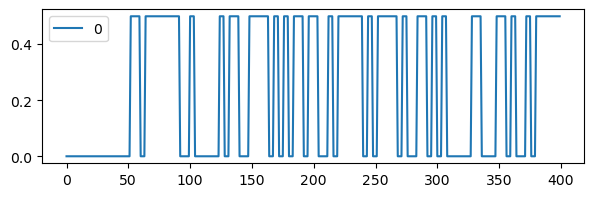

In [65]:
# Hourly timesteps
N_start = 12
N4 = N // 4 - N_start

nu = len(input_names)
rng = np.random.RandomState(0)

prbs1 = 0.5 * rng.randint(2, size=N4).astype('float64').reshape((N4, nu))
prbs1 = np.concatenate([np.zeros((N_start, nu)), prbs1])
prbs1 = np.repeat(prbs1, 4, axis=1).reshape((N, nu))
pd.DataFrame(prbs1[:400, :]).plot(figsize=(7, 2))


<Axes: >

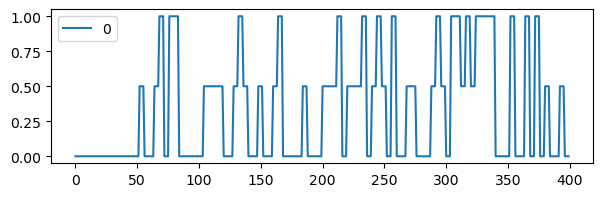

In [66]:
prbs2 = rng.choice([0.0, 0.5, 1.0], p=[0.5, 0.25, 0.25], size=N4).reshape((N4, nu))
prbs2 = np.concatenate([np.zeros((N_start, nu)), prbs2])
prbs2 = np.repeat(prbs2, 4, axis=1).reshape((N, nu))
pd.DataFrame(prbs2[:400, :]).plot(figsize=(7, 2))

In [68]:
# Simulation scenarios
sim_input_sequences = {
#    'u0_0': {'inputs': np.zeros((N, nu)), 'time_period': 'peak_heat_day'},
#    'u0_5': {'inputs': np.full((N, nu), 0.5), 'time_period': 'peak_heat_day'},
#    'u1_0': {'inputs': np.ones((N, nu)), 'time_period': 'peak_heat_day'},
    'u_prbs1': {
        'inputs': prbs1, 
        'time_period': 'peak_heat_day'
    },
    'u_prbs2': {
        'inputs': prbs2, 
        'time_period': 'peak_heat_day'
    },
}

for sim_name, sim_inputs in sim_input_sequences.items():

    assert sim_inputs['inputs'].shape == (N, nu)

    print(f"Initializing sim '{sim_name}' ...")
    #start_time = 16 * 24 * 3600
    #warmup_period = 7 * 24 * 3600
    #y = initialize_sim(url, testid, start_time, warmup_period)
    time_period = sim_inputs['time_period']
    electricity_price = 'dynamic'
    y0 = initialize_test_scenario(url, testid, time_period, electricity_price)

    print(f"Starting sim '{sim_name}' ...")
    U = sim_inputs['inputs']
    yf = simulate_open_loop(url, testid, U, input_names, step)

    # Download sim results
    point_names = input_names + measurement_names
    sim_results = download_sim_results(url, testid, point_names)

    # Save simulation results
    filename = f"sim_results_{time_period}_{sim_name}.csv"
    sim_results.to_csv(os.path.join(results_dir, filename))
    print(f"Sim results saved to {filename.__repr__()}")


Initializing sim 'u_prbs1' ...
Starting sim 'u_prbs1' ...


100%|██████████| 4032/4032 [06:20<00:00, 10.59it/s]


Sim results saved to 'sim_results_peak_heat_day_u_prbs1.csv'
Initializing sim 'u_prbs2' ...
Starting sim 'u_prbs2' ...


100%|██████████| 4032/4032 [06:19<00:00, 10.62it/s]


Sim results saved to 'sim_results_peak_heat_day_u_prbs2.csv'


### Inspect simulation results

In [69]:
sim_name = 'u_prbs2'
time_period = 'peak_heat_day'

filename = f"sim_results_{time_period}_{sim_name}.csv"
sim_results = pd.read_csv(os.path.join(results_dir, filename))
sim_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60481 entries, 0 to 60480
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              60481 non-null  int64  
 1   time                    60481 non-null  int64  
 2   time_days               60481 non-null  float64
 3   oveHeaPumY_u            60481 non-null  float64
 4   reaTZon_y               60481 non-null  float64
 5   weaSta_reaWeaHDirNor_y  60481 non-null  float64
 6   weaSta_reaWeaTDryBul_y  60481 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 3.2 MB


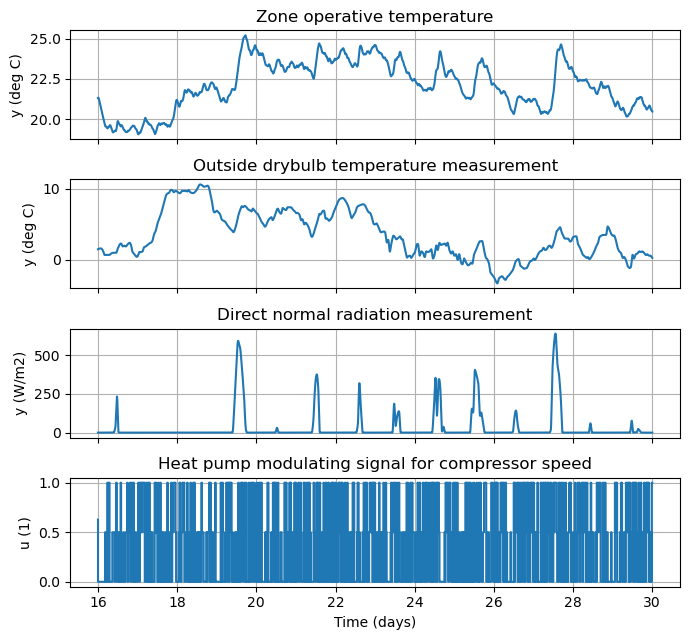

In [70]:
ny = len(measurement_names)
nu = len(input_names)
time_range = slice(16, None)

fig, axes = plt.subplots(ny + nu, 1, sharex=True, figsize=(7, 0.5 + 1.5 * (ny + nu)))

for i, (ax, name) in enumerate(zip(axes[:ny], measurement_names)):
    data = sim_results.set_index('time_days').loc[time_range, name]
    unit = available_measurements[name]['Unit']
    if unit == 'K':
        data = data - 273.15
        unit = 'deg C'
    data.plot(ax=ax, label=name)
    ax.set_ylabel(f'y ({unit})')
    ax.set_title(available_measurements[name]['Description'][:48])
    ax.grid()

for ax, name in zip(axes[ny:], input_names):
    data = sim_results.set_index('time_days').loc[time_range, name]
    unit = available_inputs[name]['Unit']
    data.plot(ax=ax, label=name, drawstyle="steps-post")
    ax.set_ylabel(f'u ({unit})')
    ax.set_title(available_inputs[name]['Description'][:48])
    ax.grid()

axes[-1].set_xlabel('Time (days)')

plt.tight_layout()
plt.show()

### KPIs

In [72]:
# Note: The warmup period is not taken into account for the calculation of the KPIs.
kpi_values = requests.get(f'{url}/kpi/{testid}').json()['payload']
kpi_values

{'tdis_tot': 42.078857017892716,
 'idis_tot': 0,
 'ener_tot': 2.787152982670009,
 'cost_tot': 0.7151545272954452,
 'emis_tot': 0.4654545481058916,
 'pele_tot': 0.021037340705945876,
 'pgas_tot': None,
 'pdih_tot': None,
 'time_rat': 0.00027327610209347704}